### Setup

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Arif/DATA/train2'
valid_path = '/content/drive/MyDrive/Arif/DATA/val'
# test_path = '/content/drive/MyDrive/Arif/DATA/test'

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes= ['malignant', 'benign'], batch_size=221)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes= ['malignant', 'benign'], batch_size=43)
# test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes= ['malignant', 'benign'], batch_size=4)

Found 4642 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [ ]:
# plots images with Labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


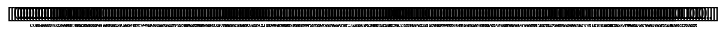

In [ ]:
plots(imgs, titles=labels)

### VGG16

#### Build

In [ ]:
vgg16_model= keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

keras.engine.functional.Functional

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

#### Train

In [ ]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=20, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
4/4 - 475s - loss: 1.1339 - accuracy: 0.5060 - val_loss: 0.9053 - val_accuracy: 0.5291 - 475s/epoch - 119s/step
Epoch 2/20
4/4 - 462s - loss: 0.9817 - accuracy: 0.4796 - val_loss: 1.0069 - val_accuracy: 0.5174 - 462s/epoch - 115s/step
Epoch 3/20
4/4 - 447s - loss: 0.9978 - accuracy: 0.4887 - val_loss: 1.0600 - val_accuracy: 0.4884 - 447s/epoch - 112s/step
Epoch 4/20
4/4 - 383s - loss: 0.9860 - accuracy: 0.4985 - val_loss: 0.9239 - val_accuracy: 0.5291 - 383s/epoch - 96s/step
Epoch 5/20
4/4 - 421s - loss: 0.9640 - accuracy: 0.4943 - val_loss: 0.9855 - val_accuracy: 0.4593 - 421s/epoch - 105s/step
Epoch 6/20
4/4 - 427s - loss: 0.9416 - accuracy: 0.4762 - val_loss: 0.9156 - val_accuracy: 0.5058 - 427s/epoch - 107s/step
Epoch 7/20
4/4 - 351s - loss: 0.9568 - accuracy: 0.4654 - val_loss: 0.8961 - val_accuracy: 0.5407 - 351s/epoch - 88s/step
Epoch 8/20
4/4 - 418s - loss: 0.9463 - accuracy: 0.4966 - val_loss: 0.9620 - val_accuracy: 0.5058 - 418s/epoch - 105s/step
Epoch 9/20
4/4 - 4